<a href="https://colab.research.google.com/github/srita2003/ML_Practicals/blob/main/ML_Prac7ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#handle missing values
df.fillna(df.mean(), inplace=True)

In [8]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

In [15]:
xg_boost = XGBClassifier(n_estimators=100, random_state=42)
xg_boost.fit(X_train, y_train)
xg_boost_predictions = xg_boost.predict(X_test)

In [16]:
ada_boost = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_boost.fit(X_train, y_train)
ada_boost_predictions = ada_boost.predict(X_test)

In [17]:
#rg_classifier accuracy,precision,recall,f1 score
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)
print("Random Forest Classifier:")
print("Accuracy:", rf_accuracy)
print("Classification Report:\n", rf_report)

#xgboost accuracy,precision,recall,f1 score
xg_accuracy = accuracy_score(y_test, xg_boost_predictions)
xg_report = classification_report(y_test, xg_boost_predictions)
print("\nXGBoost Classifier:")
print("Accuracy:", xg_accuracy)
print("Classification Report:\n", xg_report)

#adaboost accuracy,precision,recall,f1 score
ada_accuracy = accuracy_score(y_test, ada_boost_predictions)
ada_report = classification_report(y_test, ada_boost_predictions)
print("\nAdaBoost Classifier:")
print("Accuracy:", ada_accuracy)
print("Classification Report:\n", ada_report)

Random Forest Classifier:
Accuracy: 0.7207792207792207
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154


XGBoost Classifier:
Accuracy: 0.7077922077922078
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.76        99
           1       0.58      0.65      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154


AdaBoost Classifier:
Accuracy: 0.7402597402597403
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79        99
         

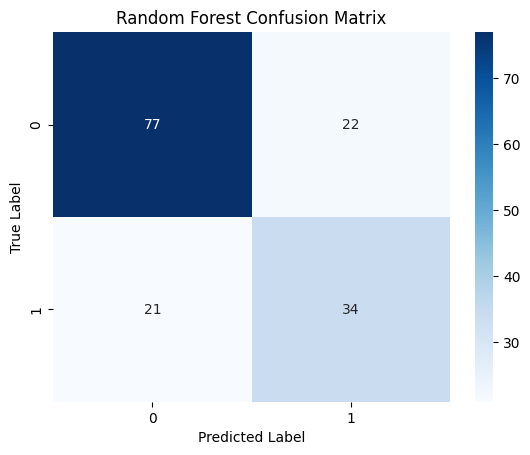

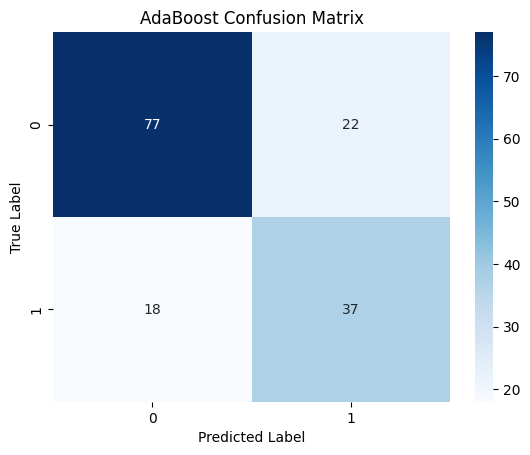

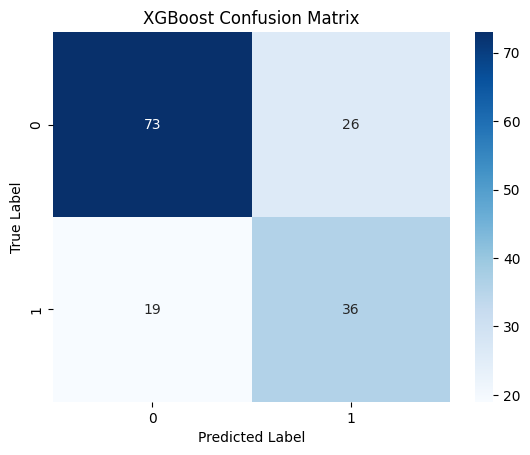

In [18]:
# Random Forest
rf_cm = confusion_matrix(y_test, rf_predictions)
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# AdaBoost
ada_cm = confusion_matrix(y_test, ada_boost_predictions)
sns.heatmap(ada_cm, annot=True, fmt="d", cmap="Blues")
plt.title("AdaBoost Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# XGBoost
xgb_cm = confusion_matrix(y_test, xg_boost_predictions)
sns.heatmap(xgb_cm, annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

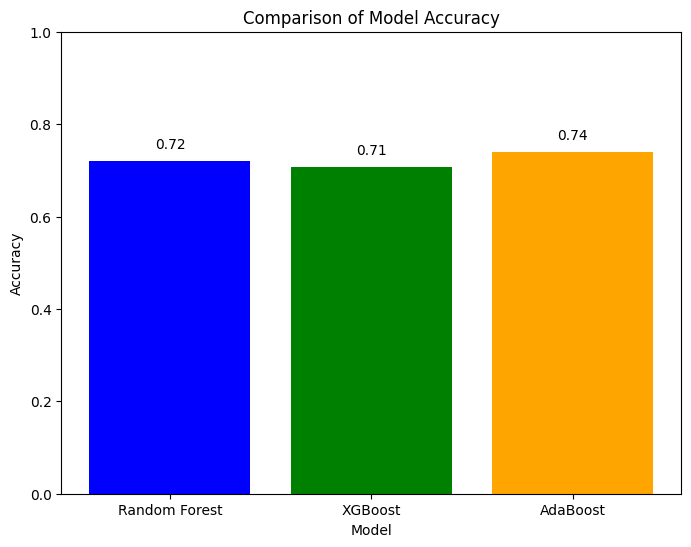

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy scores for each model
model_names = ['Random Forest', 'XGBoost', 'AdaBoost']
accuracy_scores = [rf_accuracy, xg_accuracy, ada_accuracy]

# Create the bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.bar(model_names, accuracy_scores, color=['blue', 'green', 'orange'])
plt.title('Comparison of Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for accuracy

# Add accuracy values on top of the bars
for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 0.02, str(round(score, 2)), ha='center', va='bottom')

plt.show()